In [1]:
import networkx as nx
import gzip
import ujson as json
import itertools
# import treelib
import numpy as np
import matplotlib.pyplot as plt
from torch_geometric.utils.convert import from_networkx
import torch_geometric.utils.convert
from torch_geometric.loader import DataLoader
import pandas as pd
import torch

In [2]:
print(torch.__version__)


1.11.0


In [131]:
df1=pd.read_csv("/Users/abdulmk/Projects/Capstone/Datasets/finalirmap.csv")
df1.dtypes

id             int64
created_at    object
text          object
text_info     object
dtype: object

In [101]:
df_all=pd.read_csv("/Users/abdulmk/Projects/Capstone/Datasets/alldatasetspre.csv")
df_all

,label,text
0,informative,rt gizmodo wildfires raging northern californi...
1,informative,photos deadly wildfires rage california
2,informative,rt cal oes pls share we re capturing wildfir...
3,informative,rt cal oes pls share we re capturing wildfir...
4,informative,rt time california s raging wildfires ve nev...
...,...,...
18077,not_informative,get mora try whole menu
18078,not_informative,mirka mora b 1928 noted french born austra...
18079,not_informative,paulmalignaggi lol u sergio mora n t horn winning
18080,not_informative,cameroon 4 female suicide bombers kill 1 mora


In [4]:
df1

,id,image_id,text_info,text_info_conf,image_info,image_info_conf,text_human,text_human_conf,image_human,image_human_conf,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,905625009430949888,905625009430949888_0,informative,0.6721,informative,1.0000,infrastructure_and_utility_damage,0.6721,infrastructure_and_utility_damage,1.0000,...,316,756,4,Jamaica,Cecile,slimjamaican,40303,NaN,NaN,False
1,905625059326353409,905625059326353409_0,informative,0.6545,informative,1.0000,other_relevant_information,0.6545,other_relevant_information,1.0000,...,53361,1999,408,"Washington, DC",Steve Rudin 7News,SteveRudin7News,30933,NaN,http://wjla.com/station/people/steve-rudin,True
2,905625064451833856,905625064451833856_0,informative,0.6629,informative,0.6392,infrastructure_and_utility_damage,0.6629,other_relevant_information,0.6392,...,34,179,0,Toronto,Christine 🌸,kiki_chiquita,490,NaN,NaN,False
3,905625073628975106,905625073628975106_0,informative,1.0000,informative,1.0000,other_relevant_information,1.0000,other_relevant_information,1.0000,...,597,2962,9,"Florida, USA",Laura Dill,Perspectvz,62816,NaN,NaN,False
4,905625088300654592,905625088300654592_0,informative,1.0000,informative,1.0000,other_relevant_information,1.0000,other_relevant_information,1.0000,...,2220,4298,68,Chile,Edhagadol,edhagadol,59091,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3515,910270036861886465,910270036861886465_0,informative,1.0000,informative,1.0000,other_relevant_information,1.0000,infrastructure_and_utility_damage,1.0000,...,406,243,8,NaN,On Weather,OnWeather1,71804,NaN,NaN,False
3516,910270462822895617,910270462822895617_0,informative,1.0000,not_informative,0.3779,other_relevant_information,1.0000,not_humanitarian,0.3779,...,591,61,23,"Kingsland, GA",Camden County EMA,CamdenCountyEMA,4635,NaN,https://www.camdencountyga.gov/81/Emergency-Ma...,False
3517,910270554812317697,910270554812317697_0,informative,0.6376,informative,0.6445,other_relevant_information,0.6376,other_relevant_information,0.6445,...,1090,709,29,(223/717),Nikhil Menon,multimenon,41946,NaN,https://nikhilmenon.in,False
3518,910270595262291968,910270595262291968_0,not_informative,0.6667,not_informative,1.0000,not_humanitarian,0.6667,not_humanitarian,1.0000,...,1533,3859,183,"Wewoka, OK",Jake Davis,WewokaChronicle,208925,NaN,http://writers.work/jakedavis,False


In [6]:
s='Tue Sep 19 15:47:08 +0000 2017'
ts_list = pd.to_datetime([s], infer_datetime_format=True)
#print(ts_list.values)
import dateutil.parser as parser
parser.parse(s)

def time_parser(ts):
    dobject=parser.parse(ts)
    return  dobject

In [13]:
from transformers import BertForSequenceClassification, AdamW, BertConfig, BertTokenizer


In [14]:
import torch

if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


In [15]:
output_dir = './model_save/'

bert = BertForSequenceClassification.from_pretrained(output_dir)
tokenizer = BertTokenizer.from_pretrained(output_dir)

bert.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [76]:
def getEmbed(text):
    
    marked_text = "[CLS] " + text + " [SEP]"

    tokenized_text = tokenizer.tokenize(marked_text)

    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)


    segments_ids = [1] * len(tokenized_text)
    
    tokens_tensor = torch.tensor([indexed_tokens])
    segments_tensors = torch.tensor([segments_ids])
    bert.eval()
    with torch.no_grad():

        outputs = bert(tokens_tensor, segments_tensors)

    
        hidden_states = outputs[1]
        token_vecs = hidden_states[-2][0]
        sentence_embedding = torch.mean(token_vecs, dim=0)
        res=sentence_embedding.numpy()
        return list(res)

In [17]:
import os
cwd="/Users/abdulmk/Projects/Capstone/convos"
data_arr=[]
for filename in os.listdir(cwd):
    fname=os.path.join(cwd, filename)
    data = pd.read_json(fname, lines=True)
    rootid=int(filename[:-6])
    r=df1.loc[df1['id']==rootid,['text','created_at','text_info']]
    t,c,label=r.values[0]
    d={}

    d[rootid]={'time': getEmbed(c),'text': getEmbed(t)}
    
    G=nx.DiGraph()
    G.add_node(rootid)
    for i in data['data'][0]:
        G.add_node(int(i['id']))
        d[int(i['id'])]={'time': getEmbed(i['created_at']),'text': getEmbed(i['text'])}
        G.add_edge(int(i['id']),int(i['referenced_tweets'][0]['id']))

    
    H = G.to_undirected()
    Gcc = sorted(nx.connected_components(H), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    G1=G0.to_directed()
    nx.set_node_attributes(G1, d)

    try:
        g_data=from_networkx(G1, group_node_attrs=['text', 'time'])

        g_data.y=0 if label=='informative' else 1
        data_arr.append(g_data)
    except:
        continue
    
        
print(len(data_arr))
    


320


In [18]:
dataset=data_arr
data=dataset[0]

In [19]:
print(dataset[220])

Data(edge_index=[2, 1], x=[2, 1536], y=1)


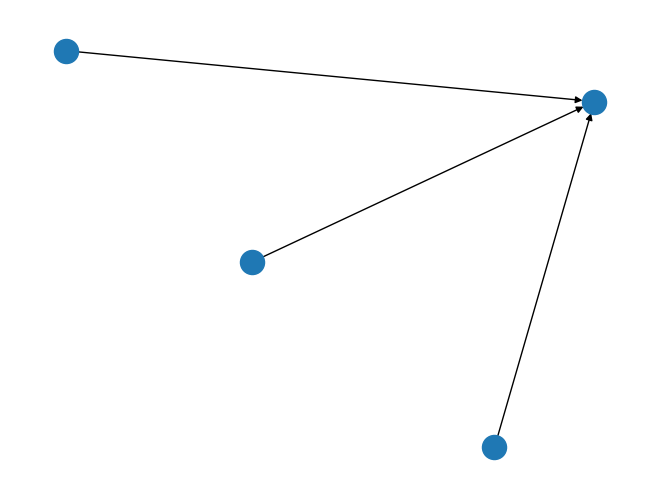

In [20]:
import networkx as nx
from torch_geometric.utils import to_networkx
G1 = to_networkx(dataset[126], to_undirected=False)
nx.draw(G1)

In [21]:
G1.nodes(data=True)

NodeDataView({0: {}, 1: {}, 2: {}, 3: {}})

In [22]:

print()
print(data)
print('=============================================================')

# Gather some statistics about the first graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


Data(edge_index=[2, 1], x=[2, 1536], y=0)
Number of nodes: 2
Number of edges: 1
Average node degree: 0.50
Has isolated nodes: False
Has self-loops: False
Is undirected: False


In [23]:
import torch
from random import shuffle
torch.manual_seed(12345)
shuffle(dataset)

train_dataset = dataset[:198]
test_dataset = dataset[198:]

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

Number of training graphs: 198
Number of test graphs: 122


In [24]:
from torch_geometric.loader import DataLoader

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

for step, data in enumerate(train_loader):
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {data.num_graphs}')
    print(data)
    print()

Step 1:
Number of graphs in the current batch: 64
DataBatch(edge_index=[2, 190], x=[254, 1536], y=[64], batch=[254], ptr=[65])

Step 2:
Number of graphs in the current batch: 64
DataBatch(edge_index=[2, 213], x=[277, 1536], y=[64], batch=[277], ptr=[65])

Step 3:
Number of graphs in the current batch: 64
DataBatch(edge_index=[2, 179], x=[243, 1536], y=[64], batch=[243], ptr=[65])

Step 4:
Number of graphs in the current batch: 6
DataBatch(edge_index=[2, 33], x=[39, 1536], y=[6], batch=[39], ptr=[7])



In [ ]:
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv,GNNExplainer
from torch_geometric.nn import global_mean_pool


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(456)
        self.fc=768
        self.conv1 = GCNConv(1536, 128)
        self.conv2 = GCNConv(128, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.lin = Linear(hidden_channels, 2)
        self.emb=None
    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)

        x = global_mean_pool(x, batch)  
        self.emb=x
        
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)
        
        return F.log_softmax(x, dim=1)

model1 = GCN(hidden_channels=64)
print(model1)

In [89]:
model1 = GCN(hidden_channels=64)
optimizer = torch.optim.Adam(model1.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

def train():
    model1.train()

    for data in train_loader:  # Iterate in batches over the training dataset.
         out = model1(data.x, data.edge_index, data.batch)  # Perform a single forward pass.
         loss = criterion(out, data.y)  # Compute the loss.
         loss.backward()  # Derive gradients.
         optimizer.step()  # Update parameters based on gradients.
         optimizer.zero_grad()  # Clear gradients.

def test(loader):
     model1.eval()

     correct = 0
     for data in loader:  # Iterate in batches over the training/test dataset.
         out = model1(data.x, data.edge_index, data.batch)  
         pred = out.argmax(dim=1)  # Use the class with highest probability.
         correct += int((pred == data.y).sum())  # Check against ground-truth labels.
         print(pred)
     return correct / len(loader.dataset)  # Derive ratio of correct predictions.

total_sum1=0
total_sum2=0
for epoch in range(1, 51):
    train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    total_sum1 = train_acc + total_sum1
    total_sum2 = test_acc + total_sum2
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')
avg1 = total_sum1/50
avg2 = total_sum2/50
print(avg1, avg2)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0,

tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0])
tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0,

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])
tensor([0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0,

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 1])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0,

tensor([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])
tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])
tensor([1, 0, 0, 0, 0, 0])
tensor([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0,

tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Epoch: 046, Train Acc: 0.9293, Test Acc: 0.7787
tensor([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])
tensor([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0])
tensor([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0])
tensor([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0

In [90]:
model1.emb

tensor([[ 1.5923, -1.1283, -0.1018,  ...,  0.4134,  1.6089,  0.7774],
        [ 2.9189, -1.0125, -1.0423,  ...,  0.8011,  2.8830,  2.4706],
        [ 3.2566, -1.9559, -0.4587,  ...,  1.0886,  3.1312,  1.7364],
        ...,
        [ 2.9551, -1.5681, -0.6983,  ...,  1.0081,  2.8575,  1.9890],
        [ 2.0397, -1.5228, -0.2003,  ...,  0.7463,  1.9837,  1.0405],
        [ 3.3072, -1.9427, -0.5719,  ...,  1.2086,  3.1521,  1.8517]],
       grad_fn=<DivBackward0>)

In [85]:
from torch_geometric.nn import GATConv

class GAT(torch.nn.Module):
    def __init__(self):
        super(GAT, self).__init__()
        self.hid = 8
        self.in_head = 8
        self.out_head = 1
        
        
        self.conv1 = GATConv(1536, self.hid, heads=self.in_head, dropout=0.4)
        self.conv2 = GATConv(self.hid*self.in_head, 2, concat=False,
                             heads=self.out_head, dropout=0.4)



    def forward(self, x, edge_index, batch):
        # 1. Obtain node embeddings 
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)

        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]
        emb=x
        # 3. Apply a final classifier
        x = F.dropout(x, p=0.3, training=self.training)
        
        return F.log_softmax(x, dim=1)
    
    
    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = "cpu"

model = GAT()

In [87]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

def train():
    model.train()

    for data in train_loader:  # Iterate in batches over the training dataset.
         out = model(data.x, data.edge_index, data.batch)  # Perform a single forward pass.
         #print(out)
         loss = criterion(out, data.y)  # Compute the loss.
         loss.backward()  # Derive gradients.
         optimizer.step()  # Update parameters based on gradients.
         optimizer.zero_grad()  # Clear gradients.

def test(loader):
     model.eval()

     correct = 0
     for data in loader:  # Iterate in batches over the training/test dataset.
         out = model(data.x, data.edge_index, data.batch)  
         #print(out)
         pred = out.argmax(dim=1)  # Use the class with highest probability.
         #print(pred)
         correct += int((pred == data.y).sum())  # Check against ground-truth labels.
     return correct / len(loader.dataset)  # Derive ratio of correct predictions.

total_sum1=0
total_sum2=0
for epoch in range(1, 101):
    train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    total_sum1 = train_acc + total_sum1
    total_sum2 = test_acc + total_sum2
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')
avg1 = total_sum1/100
avg2 = total_sum2/100
print(avg1, avg2)

tensor([[-0.8765, -0.5383],
        [-0.2290, -1.5862],
        [-0.5838, -0.8159],
        [-0.6650, -0.7221],
        [-0.6931, -0.6931],
        [-0.0877, -2.4768],
        [-1.2870, -0.3231],
        [-0.0869, -2.4859],
        [-0.6931, -0.6931],
        [-0.8899, -0.5288],
        [-0.0600, -2.8430],
        [-0.6508, -0.7374],
        [-0.4517, -1.0121],
        [-1.1198, -0.3951],
        [-0.8246, -0.5770],
        [-0.1118, -2.2465],
        [-0.6931, -0.6931],
        [-0.8590, -0.5510],
        [-0.8343, -0.5695],
        [-0.2296, -1.5841],
        [-0.6220, -0.7697],
        [-0.5597, -0.8472],
        [-0.5884, -0.8102],
        [-0.6931, -0.6931],
        [-0.6770, -0.7096],
        [-0.8210, -0.5798],
        [-1.5523, -0.2380],
        [-0.6931, -0.6931],
        [-1.3915, -0.2859],
        [-1.2082, -0.3548],
        [-1.2329, -0.3445],
        [-1.6207, -0.2203],
        [-1.5102, -0.2496],
        [-0.1360, -2.0622],
        [-0.5470, -0.8644],
        [-1.1081, -0

tensor([[-0.0645, -2.7734],
        [-0.0418, -3.1955],
        [-0.0141, -4.2712],
        [-0.0096, -4.6539],
        [-0.0268, -3.6334],
        [-0.0585, -2.8673]], grad_fn=<LogSoftmaxBackward0>)
tensor([[-0.0994, -2.3578],
        [-0.0711, -2.6788],
        [-0.0694, -2.7030],
        [-0.0495, -3.0302],
        [-0.0197, -3.9348],
        [-0.0398, -3.2431],
        [-0.0342, -3.3923],
        [-0.0421, -3.1885],
        [-0.0321, -3.4552],
        [-0.0420, -3.1906],
        [-0.0850, -2.5072],
        [-0.0440, -3.1453],
        [-0.0967, -2.3839],
        [-0.0549, -2.9293],
        [-0.0503, -3.0144],
        [-0.0564, -2.9038],
        [-0.0581, -2.8741],
        [-0.0257, -3.6746],
        [-0.0354, -3.3577],
        [-0.0241, -3.7383],
        [-0.0643, -2.7763],
        [-0.0505, -3.0100],
        [-0.0750, -2.6281],
        [-0.0705, -2.6874],
        [-0.0619, -2.8122],
        [-0.0457, -3.1089],
        [-0.0356, -3.3526],
        [-0.0120, -4.4265],
        [-0.0481

tensor([[-0.3502, -1.2193],
        [-0.2331, -1.5706],
        [-0.2173, -1.6332],
        [-0.2965, -1.3603],
        [-0.3122, -1.3162],
        [-0.2977, -1.3570],
        [-0.2132, -1.6501],
        [-0.4045, -1.1006],
        [-0.2280, -1.5902],
        [-0.2685, -1.4462],
        [-0.2899, -1.3797],
        [-0.3185, -1.2992],
        [-0.3325, -1.2627],
        [-0.1811, -1.7980],
        [-0.3671, -1.1801],
        [-0.3855, -1.1397],
        [-0.2658, -1.4551],
        [-0.2050, -1.6854],
        [-0.2622, -1.4669],
        [-0.2142, -1.6460],
        [-0.4346, -1.0427],
        [-0.3194, -1.2967],
        [-0.1529, -1.9532],
        [-0.3004, -1.3490],
        [-0.2771, -1.4187],
        [-0.1169, -2.2044],
        [-0.3363, -1.2531],
        [-0.2911, -1.3762],
        [-0.1844, -1.7812],
        [-0.2533, -1.4971],
        [-0.2649, -1.4579],
        [-0.3962, -1.1174],
        [-0.2323, -1.5735],
        [-0.2398, -1.5456],
        [-0.0967, -2.3843],
        [-0.3559, -1

tensor([[-0.5291, -0.8895],
        [-0.4446, -1.0246],
        [-0.2680, -1.4477],
        [-0.2956, -1.3630],
        [-0.3097, -1.3230],
        [-0.3877, -1.1351],
        [-0.1279, -2.1195],
        [-0.4319, -1.0478],
        [-0.5078, -0.9209],
        [-0.4739, -0.9743],
        [-0.4614, -0.9954],
        [-0.5504, -0.8598],
        [-0.4639, -0.9911],
        [-0.3342, -1.2585],
        [-0.2766, -1.4203],
        [-0.3214, -1.2915],
        [-0.4224, -1.0655],
        [-0.5674, -0.8370],
        [-0.3670, -1.1803],
        [-0.2636, -1.4623],
        [-0.5069, -0.9222],
        [-0.3950, -1.1199],
        [-0.4806, -0.9634],
        [-0.3833, -1.1445],
        [-0.2715, -1.4366],
        [-0.2981, -1.3558],
        [-0.4171, -1.0758],
        [-0.4111, -1.0874],
        [-0.2541, -1.4945],
        [-0.3665, -1.1813],
        [-0.5558, -0.8524],
        [-0.3955, -1.1188],
        [-0.3507, -1.2181],
        [-0.3754, -1.1616],
        [-0.4314, -1.0487],
        [-0.3684, -1

tensor([[-0.3828, -1.1455],
        [-0.3223, -1.2890],
        [-0.2665, -1.4525],
        [-0.2755, -1.4237],
        [-0.1226, -2.1595],
        [-0.1865, -1.7710],
        [-0.1636, -1.8913],
        [-0.2235, -1.6082],
        [-0.1839, -1.7840],
        [-0.2135, -1.6491],
        [-0.3430, -1.2366],
        [-0.1994, -1.7105],
        [-0.3511, -1.2170],
        [-0.2479, -1.5161],
        [-0.2024, -1.6970],
        [-0.2343, -1.5659],
        [-0.2472, -1.5184],
        [-0.1379, -2.0494],
        [-0.1688, -1.8625],
        [-0.1300, -2.1047],
        [-0.2956, -1.3630],
        [-0.2138, -1.6478],
        [-0.2998, -1.3508],
        [-0.2710, -1.4381],
        [-0.2468, -1.5202],
        [-0.2304, -1.5810],
        [-0.1555, -1.9381],
        [-0.0859, -2.4975],
        [-0.2387, -1.5497],
        [-0.2661, -1.4538],
        [-0.2216, -1.6157],
        [-0.1602, -1.9102],
        [-0.1936, -1.7373],
        [-0.2519, -1.5021],
        [-0.2098, -1.6649],
        [-0.2487, -1

tensor([[-0.0827, -2.5333],
        [-0.0504, -3.0137],
        [-0.3667, -1.1809],
        [-0.6931, -0.6931],
        [-0.2963, -1.3609],
        [-0.4008, -1.1079],
        [-0.0596, -2.8504],
        [-0.5517, -0.8579],
        [-0.2081, -1.6721],
        [-0.1468, -1.9911],
        [-0.1162, -2.2101],
        [-0.3059, -1.3334],
        [-0.5517, -0.8579],
        [-0.4472, -1.0201],
        [-0.2809, -1.4069],
        [-0.2701, -1.4409],
        [-0.3451, -1.2316],
        [-0.3367, -1.2522],
        [-0.4351, -1.0418],
        [-0.3100, -1.3223],
        [-0.1061, -2.2960],
        [-0.4472, -1.0201],
        [-0.6931, -0.6931],
        [-0.3690, -1.1758],
        [-0.6931, -0.6931],
        [-0.2330, -1.5709],
        [-0.3031, -1.3414],
        [-0.2302, -1.5818],
        [-0.4812, -0.9625],
        [-0.6931, -0.6931],
        [-0.1988, -1.7133],
        [-0.0055, -5.2029],
        [-0.0358, -3.3489],
        [-0.2450, -1.5264],
        [-0.0223, -3.8141],
        [-0.1828, -1

tensor([[-0.1512, -1.9641],
        [-0.2700, -1.4412],
        [-0.1013, -2.3399],
        [-0.1671, -1.8715],
        [-0.1534, -1.9505],
        [-0.4776, -0.9682],
        [-0.1215, -2.1680],
        [-0.1535, -1.9499],
        [-0.1216, -2.1674],
        [-0.3223, -1.2891],
        [-0.1325, -2.0867],
        [-0.1076, -2.2825],
        [-0.1471, -1.9896],
        [-0.2616, -1.4688],
        [-0.1628, -1.8954],
        [-0.1688, -1.8622],
        [-0.2840, -1.3974],
        [-0.1474, -1.9875],
        [-0.1945, -1.7329],
        [-0.2696, -1.4427],
        [-0.4507, -1.0139],
        [-0.3299, -1.2693],
        [-0.1647, -1.8847],
        [-0.2433, -1.5326],
        [-0.0823, -2.5387],
        [-0.2314, -1.5771],
        [-0.0863, -2.4927],
        [-0.4748, -0.9729],
        [-0.1241, -2.1480],
        [-0.1244, -2.1458],
        [-0.0773, -2.5982],
        [-0.2494, -1.5107],
        [-0.2119, -1.6556],
        [-0.2582, -1.4802],
        [-0.3701, -1.1734],
        [-0.1698, -1

tensor([[-0.4346, -1.0428],
        [-0.3541, -1.2101],
        [-0.2289, -1.5866],
        [-0.2653, -1.4565],
        [-0.0466, -3.0884],
        [-0.1159, -2.2126],
        [-0.0731, -2.6523],
        [-0.1829, -1.7889],
        [-0.0985, -2.3669],
        [-0.1211, -2.1708],
        [-0.3676, -1.1789],
        [-0.1160, -2.2118],
        [-0.3790, -1.1537],
        [-0.2059, -1.6814],
        [-0.1250, -2.1415],
        [-0.1786, -1.8106],
        [-0.2155, -1.6408],
        [-0.0433, -3.1610],
        [-0.0874, -2.4809],
        [-0.0496, -3.0283],
        [-0.3809, -1.1496],
        [-0.1460, -1.9960],
        [-0.2895, -1.3809],
        [-0.2484, -1.5142],
        [-0.1927, -1.7414],
        [-0.1785, -1.8110],
        [-0.0694, -2.7021],
        [-0.0191, -3.9652],
        [-0.1924, -1.7430],
        [-0.2283, -1.5892],
        [-0.1678, -1.8675],
        [-0.0795, -2.5716],
        [-0.1116, -2.2482],
        [-0.1979, -1.7174],
        [-0.1373, -2.0538],
        [-0.2057, -1

tensor([[-0.1965, -1.7236],
        [-0.0331, -3.4250],
        [-0.0572, -2.8899],
        [-0.1599, -1.9123],
        [-0.1637, -1.8904],
        [-0.0401, -3.2358],
        [-0.0215, -3.8520],
        [-0.4457, -1.0227],
        [-0.0429, -3.1703],
        [-0.1444, -2.0062],
        [-0.0786, -2.5821],
        [-0.2476, -1.5170],
        [-0.1960, -1.7262],
        [-0.0574, -2.8862],
        [-0.2084, -1.6708],
        [-0.2171, -1.6339],
        [-0.0965, -2.3857],
        [-0.0762, -2.6125],
        [-0.0311, -3.4871],
        [-0.0844, -2.5139],
        [-0.2577, -1.4821],
        [-0.1737, -1.8358],
        [-0.0136, -4.3013],
        [-0.1014, -2.3387],
        [-0.0427, -3.1755],
        [-0.0131, -4.3390],
        [-0.2542, -1.4941],
        [-0.1104, -2.2582],
        [-0.0445, -3.1351],
        [-0.0607, -2.8312],
        [-0.1284, -2.1159],
        [-0.2792, -1.4122],
        [-0.0712, -2.6779],
        [-0.0824, -2.5367],
        [-0.0067, -5.0091],
        [-0.1747, -1

tensor([[-0.4888, -0.9503],
        [-0.0998, -2.3538],
        [-0.2433, -1.5326],
        [-0.4888, -0.9503],
        [-0.3399, -1.2441],
        [-0.1569, -1.9299],
        [-0.3551, -1.2076],
        [-0.4888, -0.9503],
        [-0.1586, -1.9194],
        [-0.3332, -1.2611],
        [-0.3025, -1.3431],
        [-0.4567, -1.0034],
        [-0.3525, -1.2137],
        [-0.0429, -3.1706],
        [-0.4755, -0.9717],
        [-0.4888, -0.9503],
        [-0.4370, -1.0384],
        [-0.4737, -0.9747],
        [-0.2292, -1.5855],
        [-0.4888, -0.9503],
        [-0.4888, -0.9503],
        [-0.4394, -1.0340],
        [-0.2230, -1.6098],
        [-0.4538, -1.0084],
        [-0.2396, -1.5461],
        [-0.3982, -1.1134],
        [-0.2824, -1.4023],
        [-0.3658, -1.1829],
        [-0.3972, -1.1154],
        [-0.2912, -1.3759],
        [-0.4888, -0.9503],
        [-0.4888, -0.9503],
        [-0.4888, -0.9503],
        [-0.4409, -1.0313],
        [-0.1324, -2.0873],
        [-0.4888, -0

tensor([[-0.4794, -0.9653],
        [-0.1739, -1.8351],
        [-0.2062, -1.6801],
        [-0.4766, -0.9700],
        [-0.4391, -1.0345],
        [-0.1476, -1.9864],
        [-0.0820, -2.5422],
        [-0.4794, -0.9653],
        [-0.1980, -1.7169],
        [-0.4710, -0.9792],
        [-0.1616, -1.9026],
        [-0.4794, -0.9653],
        [-0.4794, -0.9653],
        [-0.3966, -1.1166],
        [-0.4282, -1.0546],
        [-0.3406, -1.2424],
        [-0.3845, -1.1420],
        [-0.3838, -1.1433],
        [-0.0975, -2.3764],
        [-0.3469, -1.2272],
        [-0.4180, -1.0740],
        [-0.4426, -1.0282],
        [-0.1133, -2.2336],
        [-0.2024, -1.6972],
        [-0.1435, -2.0122],
        [-0.2550, -1.4914],
        [-0.4794, -0.9653],
        [-0.3701, -1.1733],
        [-0.3722, -1.1688],
        [-0.1350, -2.0695],
        [-0.4382, -1.0361],
        [-0.4794, -0.9653],
        [-0.1970, -1.7212],
        [-0.2512, -1.5046],
        [-0.1801, -1.8031],
        [-0.3352, -1

tensor([[-6.9315e-01, -6.9315e-01],
        [-6.5651e-04, -7.3290e+00],
        [-3.2869e-02, -3.4316e+00],
        [-4.7964e-01, -9.6497e-01],
        [-3.5275e-01, -1.2132e+00],
        [-8.7664e-03, -4.7412e+00],
        [-3.8486e-01, -1.1411e+00],
        [-3.3543e-03, -5.6992e+00],
        [-6.9315e-01, -6.9315e-01],
        [-4.4133e-01, -1.0305e+00],
        [-8.0745e-02, -2.5566e+00],
        [-3.7587e-01, -1.1606e+00],
        [-4.6549e-01, -9.8839e-01],
        [-2.6675e-01, -1.4519e+00],
        [-3.4847e-01, -1.2234e+00],
        [-2.0127e-02, -3.9157e+00],
        [-3.9155e-01, -1.1270e+00],
        [-5.1172e-01, -9.1495e-01],
        [-2.3017e-04, -8.3766e+00],
        [-2.2619e-01, -1.5974e+00],
        [-5.4281e-02, -2.9406e+00],
        [-8.8798e-02, -2.4655e+00],
        [-6.9315e-01, -6.9315e-01],
        [-5.3263e-01, -8.8445e-01],
        [-3.8773e-01, -1.1351e+00],
        [-5.0672e-01, -9.2248e-01],
        [-3.8773e-01, -1.1351e+00],
        [-1.5944e-02, -4.146

tensor([[-0.4665, -0.9867],
        [-0.4783, -0.9672],
        [-0.3984, -1.1128],
        [-0.2763, -1.4213],
        [-0.2514, -1.5038],
        [-0.3743, -1.1641]], grad_fn=<LogSoftmaxBackward0>)
tensor([[-0.4351, -1.0419],
        [-0.4783, -0.9672],
        [-0.2607, -1.4718],
        [-0.3691, -1.1757],
        [-0.0829, -2.5314],
        [-0.0677, -2.7267],
        [-0.0667, -2.7405],
        [-0.3255, -1.2808],
        [-0.2067, -1.6781],
        [-0.2393, -1.5473],
        [-0.4648, -0.9896],
        [-0.1219, -2.1645],
        [-0.4025, -1.1045],
        [-0.4667, -0.9864],
        [-0.1087, -2.2733],
        [-0.2516, -1.5032],
        [-0.3159, -1.3062],
        [-0.0436, -3.1554],
        [-0.1099, -2.2623],
        [-0.1101, -2.2612],
        [-0.4783, -0.9672],
        [-0.3489, -1.2224],
        [-0.3379, -1.2493],
        [-0.4783, -0.9672],
        [-0.3050, -1.3362],
        [-0.3086, -1.3260],
        [-0.0681, -2.7201],
        [-0.0918, -2.4334],
        [-0.3944

tensor([[-6.9315e-01, -6.9315e-01],
        [-1.4901e-01, -1.9773e+00],
        [-1.2435e-01, -2.1462e+00],
        [-5.3180e-01, -8.8564e-01],
        [-6.9315e-01, -6.9315e-01],
        [-6.9315e-01, -6.9315e-01],
        [-4.2785e-02, -3.1729e+00],
        [-3.6420e-01, -1.1866e+00],
        [-2.2650e-05, -1.0697e+01],
        [-3.6943e-03, -5.6028e+00],
        [-7.8311e-02, -2.5860e+00],
        [-4.2998e-01, -1.0513e+00],
        [-8.6589e-02, -2.4896e+00],
        [-9.6559e-02, -2.3855e+00],
        [-3.9141e-02, -3.2601e+00],
        [-3.8445e-01, -1.1420e+00],
        [-3.4771e-01, -1.2252e+00],
        [-3.1342e-02, -3.4784e+00],
        [-5.9435e-03, -5.1284e+00],
        [-5.6070e-01, -8.4586e-01],
        [-2.8243e-01, -1.4022e+00],
        [-4.1578e-02, -3.2009e+00],
        [-5.5872e-01, -8.4849e-01],
        [-6.9315e-01, -6.9315e-01],
        [-4.2204e-01, -1.0663e+00],
        [-2.3054e-01, -1.5804e+00],
        [-4.2998e-01, -1.0513e+00],
        [-6.9315e-01, -6.931

tensor([[-0.6931, -0.6931],
        [-0.1218, -2.1658],
        [-0.0493, -3.0338],
        [-0.0077, -4.8674],
        [-0.5751, -0.8270],
        [-0.0066, -5.0182]], grad_fn=<LogSoftmaxBackward0>)
tensor([[-4.9958e-01, -9.3340e-01],
        [-2.5249e-02, -3.6916e+00],
        [-1.0140e-01, -2.3390e+00],
        [-8.6499e-02, -2.4906e+00],
        [-4.4868e-02, -3.1264e+00],
        [-4.9958e-01, -9.3340e-01],
        [-2.9796e-01, -1.3561e+00],
        [-4.3954e-01, -1.0338e+00],
        [-6.3750e-02, -2.7845e+00],
        [-7.3505e-02, -2.6469e+00],
        [-6.1650e-02, -2.8169e+00],
        [-3.9455e-02, -3.2523e+00],
        [-4.9958e-01, -9.3340e-01],
        [-1.0207e-01, -2.3327e+00],
        [-1.6265e-01, -1.8964e+00],
        [-1.1006e-01, -2.2613e+00],
        [-1.2665e-03, -6.6722e+00],
        [-2.6269e-02, -3.6525e+00],
        [-4.9958e-01, -9.3340e-01],
        [-8.0113e-02, -2.5641e+00],
        [-1.5057e-01, -1.9677e+00],
        [-1.5613e-01, -1.9341e+00],
        

tensor([[-0.0093, -4.6828],
        [-0.1985, -1.7148],
        [-0.0844, -2.5137],
        [-0.0128, -4.3631],
        [-0.4456, -1.0228],
        [-0.3829, -1.1453]], grad_fn=<LogSoftmaxBackward0>)
tensor([[-0.4869, -0.9534],
        [-0.5141, -0.9114],
        [-0.1727, -1.8414],
        [-0.0612, -2.8236],
        [-0.0356, -3.3529],
        [-0.5141, -0.9114],
        [-0.1621, -1.8995],
        [-0.1693, -1.8593],
        [-0.0201, -3.9170],
        [-0.5141, -0.9114],
        [-0.1020, -2.3331],
        [-0.0574, -2.8857],
        [-0.0325, -3.4438],
        [-0.1479, -1.9845],
        [-0.0169, -4.0883],
        [-0.0701, -2.6929],
        [-0.0339, -3.4006],
        [-0.4965, -0.9382],
        [-0.0534, -2.9571],
        [-0.5141, -0.9114],
        [-0.3592, -1.1982],
        [-0.1820, -1.7931],
        [-0.2617, -1.4685],
        [-0.0110, -4.5144],
        [-0.0635, -2.7890],
        [-0.0259, -3.6662],
        [-0.1568, -1.9299],
        [-0.2738, -1.4292],
        [-0.5141

tensor([[-5.2605e-01, -8.9388e-01],
        [-5.2605e-01, -8.9388e-01],
        [-5.2605e-01, -8.9388e-01],
        [-6.6006e-02, -2.7508e+00],
        [-2.5187e-01, -1.5021e+00],
        [-4.9889e-01, -9.3446e-01],
        [-4.9053e-02, -3.0393e+00],
        [-9.8914e-02, -2.3625e+00],
        [-5.2605e-01, -8.9388e-01],
        [-5.2605e-01, -8.9388e-01],
        [-5.0757e-01, -9.2119e-01],
        [-5.2605e-01, -8.9388e-01],
        [-2.5331e-01, -1.4971e+00],
        [-2.5264e-01, -1.4995e+00],
        [-5.2605e-01, -8.9388e-01],
        [-2.7947e-02, -3.5914e+00],
        [-1.4591e-01, -1.9968e+00],
        [-1.8583e-01, -1.7744e+00],
        [-1.1203e-01, -2.2445e+00],
        [-5.2605e-01, -8.9388e-01],
        [-8.7390e-02, -2.4808e+00],
        [-1.4749e-01, -1.9868e+00],
        [-4.2328e-01, -1.0639e+00],
        [-2.5632e-03, -5.9678e+00],
        [-1.0040e-01, -2.3483e+00],
        [-9.2932e-03, -4.6831e+00],
        [-2.2657e-01, -1.5958e+00],
        [-5.2811e-02, -2.967

tensor([[-4.3391e-05, -1.0046e+01],
        [-6.9928e-02, -2.6951e+00],
        [-2.5485e-02, -3.6824e+00],
        [-3.2064e-01, -1.2935e+00],
        [-7.2407e-02, -2.6614e+00],
        [-2.9551e-01, -1.3632e+00],
        [-4.0441e-01, -1.1007e+00],
        [-5.1936e-01, -9.0362e-01],
        [-2.2199e-01, -1.6141e+00],
        [-9.5710e-03, -4.6538e+00],
        [-5.9717e-01, -7.9932e-01],
        [-5.8038e-04, -7.4522e+00],
        [-2.1699e-01, -1.6344e+00],
        [-5.9717e-01, -7.9932e-01],
        [-1.8336e-01, -1.7866e+00],
        [-3.6102e-04, -7.9268e+00],
        [-5.5741e-01, -8.5024e-01],
        [-4.6797e-01, -9.8422e-01],
        [-4.7598e-01, -9.7095e-01],
        [-4.4267e-01, -1.0281e+00],
        [-1.9024e-04, -8.5672e+00],
        [-5.5741e-01, -8.5024e-01],
        [-5.1053e-01, -9.1674e-01],
        [-7.8874e-04, -7.1455e+00],
        [-9.5536e-04, -6.9539e+00],
        [-6.9315e-01, -6.9315e-01],
        [-2.0324e-02, -3.9061e+00],
        [-6.9315e-01, -6.931

tensor([[-1.8062e-01, -1.8003e+00],
        [-1.2683e-01, -2.1276e+00],
        [-5.9097e-02, -2.8580e+00],
        [-8.0939e-02, -2.5543e+00],
        [-2.1244e-03, -6.1553e+00],
        [-4.1105e-01, -1.0875e+00],
        [-9.8204e-02, -2.3694e+00],
        [-5.4300e-01, -8.6989e-01],
        [-2.9565e-02, -3.5359e+00],
        [-5.4300e-01, -8.6989e-01],
        [-3.3681e-01, -1.2519e+00],
        [-5.4300e-01, -8.6989e-01],
        [-1.1754e-01, -2.1992e+00],
        [-1.1563e-01, -2.2146e+00],
        [-3.1419e-01, -1.3107e+00],
        [-6.0847e-02, -2.8297e+00],
        [-1.2278e-01, -2.1581e+00],
        [-8.0573e-02, -2.5586e+00],
        [-3.0558e-02, -3.5034e+00],
        [-5.4300e-01, -8.6989e-01],
        [-8.2493e-02, -2.5360e+00],
        [-2.7818e-01, -1.4154e+00],
        [-5.5205e-02, -2.9242e+00],
        [-1.2125e-02, -4.4185e+00],
        [-5.9795e-02, -2.8466e+00],
        [-8.8651e-02, -2.4670e+00],
        [-9.4578e-02, -2.4052e+00],
        [-2.7013e-01, -1.440

tensor([[-0.4627, -0.9931],
        [-0.3357, -1.2546],
        [-0.0470, -3.0811],
        [-0.3630, -1.1895],
        [-0.5571, -0.8506],
        [-0.2629, -1.4645],
        [-0.1123, -2.2421],
        [-0.5571, -0.8506],
        [-0.0322, -3.4520],
        [-0.3591, -1.1983],
        [-0.0935, -2.4158],
        [-0.5571, -0.8506],
        [-0.5571, -0.8506],
        [-0.2240, -1.6060],
        [-0.3017, -1.3453],
        [-0.4137, -1.0823],
        [-0.2700, -1.4412],
        [-0.2506, -1.5065],
        [-0.0758, -2.6169],
        [-0.0976, -2.3748],
        [-0.4488, -1.0173],
        [-0.4328, -1.0461],
        [-0.2683, -1.4469],
        [-0.0322, -3.4526],
        [-0.1560, -1.9352],
        [-0.4895, -0.9492],
        [-0.5571, -0.8506],
        [-0.2173, -1.6333],
        [-0.1600, -1.9114],
        [-0.0216, -3.8474],
        [-0.4867, -0.9536],
        [-0.5571, -0.8506],
        [-0.0366, -3.3261],
        [-0.4072, -1.0952],
        [-0.4870, -0.9532],
        [-0.1584, -1

tensor([[-0.5830, -0.8169],
        [-0.3549, -1.2082],
        [-0.6931, -0.6931],
        [-0.6086, -0.7855],
        [-0.5673, -0.8371],
        [-0.5830, -0.8169],
        [-0.4490, -1.0169],
        [-0.2678, -1.4485],
        [-0.5479, -0.8632],
        [-0.6931, -0.6931],
        [-0.5875, -0.8113],
        [-0.4995, -0.9335],
        [-0.6931, -0.6931],
        [-0.5119, -0.9146],
        [-0.5297, -0.8886],
        [-0.6931, -0.6931],
        [-0.4095, -1.0906],
        [-0.4112, -1.0872],
        [-0.5673, -0.8371],
        [-0.5087, -0.9195],
        [-0.5087, -0.9195],
        [-0.5890, -0.8094],
        [-0.4735, -0.9751],
        [-0.4643, -0.9904],
        [-0.6931, -0.6931],
        [-0.6931, -0.6931],
        [-0.0342, -3.3914],
        [-0.6931, -0.6931],
        [-0.5830, -0.8169],
        [-0.4663, -0.9871],
        [-0.5087, -0.9195],
        [-0.6931, -0.6931],
        [-0.0628, -2.7986],
        [-0.0972, -2.3787],
        [-0.4351, -1.0418],
        [-0.5087, -0

tensor([[-3.4654e-01, -1.2280e+00],
        [-5.3315e-01, -8.8371e-01],
        [-1.3329e-01, -2.0812e+00],
        [-1.7743e-01, -1.8166e+00],
        [-3.4567e-01, -1.2301e+00],
        [-3.2856e-02, -3.4320e+00],
        [-4.9902e-02, -3.0225e+00],
        [-4.5626e-01, -1.0042e+00],
        [-8.6760e-03, -4.7515e+00],
        [-1.2102e-01, -2.1717e+00],
        [-4.9886e-01, -9.3451e-01],
        [-3.3318e-02, -3.4183e+00],
        [-1.6167e-01, -1.9019e+00],
        [-5.3315e-01, -8.8371e-01],
        [-4.5323e-02, -3.1165e+00],
        [-4.0324e-01, -1.1031e+00],
        [-2.8207e-01, -1.4033e+00],
        [-9.5399e-03, -4.6570e+00],
        [-5.9358e-02, -2.8537e+00],
        [-1.3658e-01, -2.0584e+00],
        [-5.3315e-01, -8.8371e-01],
        [-5.3315e-01, -8.8371e-01],
        [-1.5507e-01, -1.9404e+00],
        [-5.3315e-01, -8.8371e-01],
        [-3.3498e-01, -1.2565e+00],
        [-2.7668e-01, -1.4200e+00],
        [-1.3812e-02, -4.2891e+00],
        [-1.9375e-02, -3.953

tensor([[-3.9036e-01, -1.1295e+00],
        [-1.9922e-01, -1.7113e+00],
        [-5.2993e-01, -8.8831e-01],
        [-2.2363e-01, -1.6075e+00],
        [-5.7986e-02, -2.8764e+00],
        [-5.2955e-01, -8.8884e-01],
        [-3.5630e-01, -1.2048e+00],
        [-3.5620e-01, -1.2051e+00],
        [-1.0877e-01, -2.2724e+00],
        [-2.8993e-03, -5.8448e+00],
        [ 0.0000e+00, -2.0657e+01],
        [-6.2982e-04, -7.3703e+00],
        [-1.6093e-05, -1.1034e+01],
        [-1.1620e-02, -4.4608e+00],
        [-2.3036e-01, -1.5811e+00],
        [-1.9361e-01, -1.7372e+00],
        [-3.2450e-01, -1.2833e+00],
        [-6.7730e-03, -4.9982e+00],
        [ 0.0000e+00, -1.7878e+01],
        [-9.8564e-02, -2.3659e+00],
        [-8.2254e-06, -1.1707e+01],
        [-4.6678e-01, -9.8622e-01],
        [-1.8351e-01, -1.7858e+00],
        [-5.1448e-02, -2.9928e+00],
        [-5.8390e-01, -8.1581e-01],
        [-1.3386e-01, -2.0772e+00],
        [-1.6508e-02, -4.1121e+00],
        [-5.7311e-01, -8.295

tensor([[-5.2354e-01, -8.9752e-01],
        [-8.8131e-02, -2.4727e+00],
        [-3.0645e-02, -3.5006e+00],
        [-1.2535e-02, -4.3855e+00],
        [-4.6138e-02, -3.0991e+00],
        [-2.4502e-01, -1.5264e+00],
        [-5.2354e-01, -8.9752e-01],
        [-1.5406e-02, -4.1807e+00],
        [-1.4324e-02, -4.2530e+00],
        [-5.2354e-01, -8.9752e-01],
        [-4.1725e-01, -1.0755e+00],
        [-8.2872e-03, -4.7972e+00],
        [-1.5564e-02, -4.1706e+00],
        [-1.1254e-02, -4.4926e+00],
        [-4.8593e-01, -9.5483e-01],
        [-3.1617e-03, -5.7583e+00],
        [-1.1259e-01, -2.2398e+00],
        [-4.1269e-02, -3.2082e+00],
        [-2.4758e-02, -3.7110e+00],
        [-2.4973e-02, -3.7024e+00],
        [-5.7010e-03, -5.1700e+00],
        [-6.8416e-02, -2.7162e+00],
        [-3.0390e-02, -3.5088e+00],
        [-5.2354e-01, -8.9752e-01],
        [-8.0699e-02, -2.5571e+00],
        [-5.2354e-01, -8.9752e-01],
        [-5.2354e-01, -8.9752e-01],
        [-2.4968e-01, -1.509

tensor([[-2.7319e-04, -8.2056e+00],
        [-5.2505e-01, -8.9533e-01],
        [-1.2100e-02, -4.4206e+00],
        [-1.0115e-03, -6.8969e+00],
        [-2.2885e-03, -6.0810e+00],
        [-3.0771e-01, -1.3285e+00]], grad_fn=<LogSoftmaxBackward0>)
tensor([[-1.5516e-01, -1.9399e+00],
        [-5.2505e-01, -8.9533e-01],
        [-3.4529e-02, -3.3832e+00],
        [-3.2348e-02, -3.4473e+00],
        [-6.4107e-02, -2.7791e+00],
        [-1.7421e-02, -4.0588e+00],
        [-9.7955e-03, -4.6307e+00],
        [-1.9591e-01, -1.7265e+00],
        [-2.9280e-03, -5.8349e+00],
        [-1.1199e-02, -4.4975e+00],
        [-2.0104e-01, -1.7031e+00],
        [-2.9939e-03, -5.8127e+00],
        [-3.6614e-02, -3.3256e+00],
        [-9.4606e-02, -2.4050e+00],
        [-1.0277e-02, -4.5830e+00],
        [-1.1853e-01, -2.1912e+00],
        [-1.0388e-01, -2.3160e+00],
        [-3.7881e-03, -5.5778e+00],
        [-3.0135e-02, -3.5171e+00],
        [-6.0247e-02, -2.8393e+00],
        [-4.4611e-01, -1.0220e+0

tensor([[-3.3016e-02, -3.4272e+00],
        [-5.2138e-01, -9.0067e-01],
        [-2.3051e-02, -3.7815e+00],
        [-6.1304e-01, -7.8024e-01],
        [-2.5911e-01, -1.4772e+00],
        [-2.8521e-01, -1.3937e+00],
        [-2.1458e-06, -1.3040e+01],
        [-5.3942e-01, -8.7487e-01],
        [-6.9315e-01, -6.9315e-01],
        [-2.9508e-02, -3.5378e+00],
        [-3.7135e-02, -3.3117e+00],
        [-1.6870e-02, -4.0906e+00],
        [-4.7684e-06, -1.2257e+01],
        [-4.8584e-01, -9.5499e-01],
        [-2.4524e-01, -1.5256e+00],
        [-4.2731e-01, -1.0563e+00],
        [-6.9315e-01, -6.9315e-01],
        [-6.1304e-01, -7.8024e-01],
        [-4.9070e-01, -9.4726e-01],
        [-5.3946e-01, -8.7481e-01],
        [-4.2648e-01, -1.0579e+00],
        [-5.3951e-01, -8.7475e-01],
        [-5.3667e-01, -8.7873e-01],
        [-4.0177e-03, -5.5191e+00],
        [ 0.0000e+00, -2.4411e+01],
        [-8.0666e-02, -2.5575e+00],
        [-4.8584e-01, -9.5499e-01],
        [-6.4899e-02, -2.767

tensor([[-4.9234e-02, -3.0357e+00],
        [-2.8521e-02, -3.5713e+00],
        [-4.5530e-01, -1.0058e+00],
        [-1.0302e-03, -6.8786e+00],
        [-6.7950e-04, -7.2946e+00],
        [-2.2292e-05, -1.0710e+01],
        [-6.9315e-01, -6.9315e-01],
        [-4.0543e-03, -5.5100e+00],
        [ 0.0000e+00, -2.5312e+01],
        [-6.9315e-01, -6.9315e-01],
        [-4.5298e-01, -1.0099e+00],
        [-5.5377e-01, -8.5514e-01],
        [-3.9729e-01, -1.1152e+00],
        [-5.3487e-02, -2.9549e+00],
        [-4.0531e-06, -1.2407e+01],
        [-5.7088e-01, -8.3247e-01],
        [-2.0383e-03, -6.1967e+00],
        [-5.2781e-01, -8.9135e-01],
        [-3.3862e-04, -7.9907e+00],
        [-6.9315e-01, -6.9315e-01],
        [-1.2208e-03, -6.7089e+00],
        [-5.0642e-01, -9.2294e-01],
        [-1.5378e-05, -1.1082e+01],
        [-8.2462e-03, -4.8021e+00],
        [-6.2734e-01, -7.6359e-01],
        [ 0.0000e+00, -2.5059e+01],
        [-4.4114e-02, -3.1429e+00],
        [-6.2824e-01, -7.625

tensor([[-2.3842e-07, -1.5166e+01],
        [-5.4842e-02, -2.9306e+00],
        [-2.3338e-01, -1.5695e+00],
        [-6.9315e-01, -6.9315e-01],
        [-1.4710e-01, -1.9893e+00],
        [-3.8361e-01, -1.1438e+00],
        [-7.7602e-05, -9.4641e+00],
        [-6.9315e-01, -6.9315e-01],
        [-6.8445e-02, -2.7158e+00],
        [-2.8849e-03, -5.8497e+00],
        [-6.4507e-04, -7.3464e+00],
        [-5.7533e-01, -8.2672e-01],
        [-6.9315e-01, -6.9315e-01],
        [ 0.0000e+00, -2.1843e+01],
        [-5.2631e-01, -8.9350e-01],
        [-3.1878e-01, -1.2984e+00],
        [-2.0573e-01, -1.6823e+00],
        [-5.6184e-01, -8.4434e-01],
        [-5.2631e-01, -8.9350e-01],
        [-2.4238e-01, -1.5360e+00],
        [-3.7259e-01, -1.1678e+00],
        [-5.3726e-01, -8.7791e-01],
        [-2.8886e-03, -5.8484e+00],
        [-2.1375e-02, -3.8562e+00],
        [ 0.0000e+00, -1.6898e+01],
        [-2.4351e-03, -6.0190e+00],
        [-5.6352e-01, -8.4212e-01],
        [-5.2631e-01, -8.935

tensor([[-3.5377e-02, -3.3593e+00],
        [-1.6492e-01, -1.8836e+00],
        [-8.9540e-02, -2.4575e+00],
        [-5.6838e-03, -5.1730e+00],
        [-5.7986e-01, -8.2092e-01],
        [-1.7996e-03, -6.3211e+00],
        [-2.4496e-01, -1.5266e+00],
        [-9.4786e-03, -4.6635e+00],
        [-6.8849e-03, -4.9819e+00],
        [-4.2746e-02, -3.1738e+00],
        [-3.9696e-03, -5.5311e+00],
        [-2.4408e-01, -1.5298e+00],
        [-1.2698e-03, -6.6695e+00],
        [-4.3201e-02, -3.1634e+00],
        [-5.7986e-01, -8.2092e-01],
        [-1.3664e-02, -4.2998e+00],
        [-1.0497e-02, -4.5619e+00],
        [-1.2463e-03, -6.6883e+00],
        [-2.1171e-02, -3.8657e+00],
        [-9.5796e-03, -4.6529e+00],
        [-2.4741e-01, -1.5179e+00],
        [-5.7986e-01, -8.2092e-01],
        [-2.2307e-02, -3.8140e+00],
        [-1.9784e-02, -3.9327e+00],
        [-1.2661e-02, -4.3755e+00],
        [-9.6120e-04, -6.9479e+00],
        [-1.2898e-04, -8.9559e+00],
        [-3.1745e-01, -1.302

tensor([[-6.6559e-02, -2.7428e+00],
        [-5.0453e-02, -3.0118e+00],
        [-5.8560e-03, -5.1432e+00],
        [-6.0996e-01, -7.8389e-01],
        [-3.1193e-02, -3.4831e+00],
        [-2.3871e-02, -3.7470e+00],
        [-6.0996e-01, -7.8389e-01],
        [-4.9214e-02, -3.0361e+00],
        [-6.0996e-01, -7.8389e-01],
        [-1.2021e-02, -4.4271e+00],
        [-5.3374e-03, -5.2357e+00],
        [-5.4750e-03, -5.2103e+00],
        [-4.7900e-02, -3.0625e+00],
        [-1.4332e-01, -2.0135e+00],
        [-6.1508e-02, -2.8192e+00],
        [-8.5250e-02, -2.5045e+00],
        [-6.0996e-01, -7.8389e-01],
        [-2.1846e-01, -1.6284e+00],
        [-6.0996e-01, -7.8389e-01],
        [-7.8925e-02, -2.5785e+00],
        [-1.3305e-01, -2.0828e+00],
        [-4.6568e-01, -9.8809e-01],
        [-6.0996e-01, -7.8389e-01],
        [-6.0996e-01, -7.8389e-01],
        [-8.7010e-02, -2.4849e+00],
        [-1.4220e-02, -4.2602e+00],
        [-1.4130e-01, -2.0267e+00],
        [-4.3598e-01, -1.040

tensor([[-5.5793e-03, -5.1915e+00],
        [-6.1055e-01, -7.8318e-01],
        [-5.9672e-02, -2.8486e+00],
        [-9.9696e-03, -4.6132e+00],
        [-3.8306e-03, -5.5667e+00],
        [-3.6560e-02, -3.3270e+00],
        [-1.0688e-01, -2.2890e+00],
        [-1.0839e-01, -2.2757e+00],
        [-7.6567e-02, -2.6076e+00],
        [-8.0255e-04, -7.1281e+00],
        [-4.4356e-03, -5.4203e+00],
        [-6.1055e-01, -7.8318e-01],
        [-4.1969e-03, -5.4755e+00],
        [-6.0471e-01, -7.9017e-01],
        [-6.1055e-01, -7.8318e-01],
        [-5.0496e-04, -7.5913e+00],
        [-4.3993e-02, -3.1456e+00],
        [-4.2549e-02, -3.1783e+00],
        [-6.1055e-01, -7.8318e-01],
        [-1.5533e-03, -6.4682e+00],
        [-5.9398e-03, -5.1290e+00],
        [-4.8812e-01, -9.5134e-01],
        [-3.0632e-04, -8.0909e+00],
        [-2.1587e-02, -3.8464e+00],
        [-9.6833e-03, -4.6422e+00],
        [-1.0227e-02, -4.5878e+00],
        [-1.7297e-01, -1.8399e+00],
        [-2.1019e-01, -1.663

tensor([[-2.3956e-01, -1.5464e+00],
        [-7.3282e-03, -4.9197e+00],
        [-3.0109e-03, -5.8070e+00],
        [-4.4657e-02, -3.1310e+00],
        [-2.7762e-01, -1.4171e+00],
        [-9.9835e-03, -4.6118e+00],
        [-7.3120e-04, -7.2211e+00],
        [-6.1738e-01, -7.7513e-01],
        [-3.6745e-04, -7.9092e+00],
        [-3.4864e-02, -3.3737e+00],
        [-1.4995e-04, -8.8054e+00],
        [-2.4241e-01, -1.5359e+00],
        [-6.1738e-01, -7.7513e-01],
        [-4.5343e-02, -3.1161e+00],
        [-3.6206e-02, -3.3366e+00],
        [-2.3776e-02, -3.7510e+00],
        [-2.5300e-02, -3.6896e+00],
        [-4.5664e-02, -3.1092e+00],
        [-6.8927e-04, -7.2803e+00],
        [-1.7108e-02, -4.0767e+00],
        [-5.9653e-02, -2.8489e+00],
        [-3.2513e-01, -1.2817e+00],
        [-2.0293e-03, -6.2011e+00],
        [-3.5625e-04, -7.9401e+00],
        [-3.1560e-03, -5.7600e+00],
        [-1.4699e-02, -4.2273e+00],
        [-6.1738e-01, -7.7513e-01],
        [-2.6593e-02, -3.640

In [136]:
df1=pd.read_csv("/Users/abdulmk/Projects/Capstone/Datasets/finalirmap.csv")
df1['id']=df1['id'].astype('int64')
data_arr=[]
count=0
for filename in os.listdir(cwd):
    fname=os.path.join(cwd, filename)
    data = pd.read_json(fname, lines=True)
    rootid=int(filename[:-6])
    r=df1.loc[df1['id']==rootid,['text','created_at','text_info']]
    #print(r)
    t,c,label=r.values[0]
    d={}

    d[rootid]={'time': getEmbed(c),'text': getEmbed(t)}
    
    G=nx.DiGraph()
    G.add_node(rootid)
    for i in data['data'][0]:
        G.add_node(int(i['id']))
        d[int(i['id'])]={'time': getEmbed(i['created_at']),'text': getEmbed(i['text'])}
        G.add_edge(int(i['id']),int(i['referenced_tweets'][0]['id']))
    
    H = G.to_undirected()
    Gcc = sorted(nx.connected_components(H), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    G1=G0.to_directed()
    nx.set_node_attributes(G1, d)

    try:

        g_data=from_networkx(G1, group_node_attrs=['text', 'time'])
        lab=0 if label=='informative' else 1
        g_data.y=lab
        data_arr.append((t,g_data,lab))
        count+=1
        print("done ",count)
        
    except:
        continue
print(data_arr[0])

done  1
done  2
done  3
done  4
done  5
done  6
done  7
done  8
done  9
done  10
done  11
done  12
done  13
done  14
done  15
done  16
done  17
done  18
done  19
done  20
done  21
done  22
done  23
done  24
done  25
done  26
done  27
done  28
done  29
done  30
done  31
done  32
done  33
done  34
done  35
done  36
done  37
done  38
done  39
done  40
done  41
done  42
done  43
done  44
done  45
done  46
done  47
done  48
done  49
done  50
done  51
done  52
done  53
done  54
done  55
done  56
done  57
done  58
done  59
done  60
done  61
done  62
done  63
done  64
done  65
done  66
done  67
done  68
done  69
done  70
done  71
done  72
done  73
done  74
done  75
done  76
done  77
done  78
done  79
done  80
done  81
done  82
done  83
done  84
done  85
done  86
done  87
done  88
done  89
done  90
done  91
done  92
done  93
done  94
done  95
done  96
done  97
done  98
done  99
done  100
done  101
done  102
done  103
done  104
done  105
done  106
done  107
done  108
done  109
done  110
done  11

In [140]:
darr=data_arr


In [30]:

from interpret_text.experimental.common.utils_bert import Language, Tokenizer, BERTSequenceClassifier
from interpret_text.experimental.common.timer import Timer
from interpret_text.experimental.unified_information import UnifiedInformationExplainer
interpretBERT=torch.load('./model.ckpt')
interpretBERT
tokenizerIP=torch.load('./token.ckpt')
tokenizerIP
MAX_LEN=100

In [77]:
class Joint(torch.nn.Module):
    def __init__(self,bert,gnn):
        super(Joint,self).__init__()
        self.bert=bert
        self.gnn=gnn
        self.fc1=Linear(832,64)
        self.fc2=Linear(64,2)
    
    def forward(self,x1,x2):
        textemb=torch.tensor(getEmbed(x1))
        tokens_text = tokenizerIP.tokenize([str(x1).lower()])
        tokens_text, mask_text, _ = tokenizerIP.preprocess_classification_tokens(tokens_text, MAX_LEN)
        o1=interpretBERT.predict(token_ids=tokens_text,input_mask=mask_text, batch_size=64)
        o2=self.gnn(x2.x,x2.edge_index,batch=None)
        pred = o2.argmax(dim=1)  
        
        
        x = torch.cat([textemb, torch.tensor(self.gnn.emb[0])], dim=-1)
        x=self.fc1(F.relu(x))
        x=self.fc2(F.relu(x))
        return x,o1,pred
    

In [78]:
for param in bert.parameters():
    param.requires_grad = False
for param in model1.parameters():
    param.requires_grad = False

jmodel=Joint(bert,model1)
print(jmodel)


Joint(
  (bert): BertForSequenceClassification(
    (bert): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(30522, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0): BertLayer(
            (attention): BertAttention(
              (self): BertSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense): Linear(in_features=768, out_features=768, bias=True)
      

In [141]:
from sklearn.model_selection import train_test_split
X=[[a[0],a[1]] for a in darr ]
y=[a[2] for a in darr]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=jmodel.parameters(), lr=1e-3)



for epoch in range(5):
    running_loss = 0.0
    for i in range(len(X_train)):
        x1,x2=X_train[i]
        label=y_train[i]
        jmodel.train()

        optimizer.zero_grad()

        preds,_,_ = jmodel(x1, x2)
        
        loss = criterion(preds, torch.tensor(label))

        loss.requires_grad_(True)

        loss.backward()
        optimizer.step()
        #print(loss.item())
        running_loss += loss.item()
        if i % 50 == 49:    
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 50:.3f}')
            running_loss = 0.0

Iteration: 100%|██████████████████████████████████| 1/1 [00:01<00:00,  1.93s/it]
/var/folders/05/052ncv8d7qlfb__v03p6cqlm0000gn/T/ipykernel_32465/1208128289.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.cat([textemb, torch.tensor(self.gnn.emb[0])], dim=-1)
Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.42it/s]


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.34it/s]


[1,    50] loss: 0.489


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.78it/s]


[1,   100] loss: 0.303


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.52it/s]


[1,   150] loss: 0.292


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.54it/s]


[1,   200] loss: 0.216


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.90it/s]


[1,   250] loss: 0.307


100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 1388.38it/s]


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.92it/s]


[2,    50] loss: 0.236


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.09it/s]


[2,   100] loss: 0.214


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.76it/s]


[2,   150] loss: 0.255


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.24it/s]


[2,   200] loss: 0.170


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.19it/s]


[2,   250] loss: 0.244


100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 1505.49it/s]


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.13it/s]


[3,    50] loss: 0.190


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.34it/s]


[3,   100] loss: 0.199


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.49it/s]


[3,   150] loss: 0.212


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.13it/s]


[3,   200] loss: 0.145


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.57it/s]


[3,   250] loss: 0.202


100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 1683.11it/s]


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.04it/s]


[4,    50] loss: 0.151


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.37it/s]


[4,   100] loss: 0.186


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.12it/s]


[4,   150] loss: 0.166


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.65it/s]


[4,   200] loss: 0.122


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.28it/s]


[4,   250] loss: 0.167


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 886.75it/s]


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.42it/s]


[5,    50] loss: 0.122


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.46it/s]


[5,   100] loss: 0.176


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.48it/s]


[5,   150] loss: 0.127


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.38it/s]


[5,   200] loss: 0.096


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.32it/s]


[5,   250] loss: 0.134


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.31it/s]


In [80]:
correct = 0
total = 0
correcttext=0
correctgraph=0
with torch.no_grad():
    for i in range(len(X_test)):
        x1,x2=X_test[i]
        label=y_test[i]
        outputs,textpred,graphpred = jmodel(x1,x2)
        
        _, predicted = torch.max(outputs.data, -1)
        
        total += 1
        correct += 1 if predicted.item()==label else 0
        
        textpred=textpred[0]
        correcttext+=1 if textpred==label else 0
        correctgraph += 1 if graphpred.item()==label else 0
        print(label,predicted,textpred,graphpred)

Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.54it/s]
/var/folders/05/052ncv8d7qlfb__v03p6cqlm0000gn/T/ipykernel_32465/1208128289.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.cat([textemb, torch.tensor(self.gnn.emb[0])], dim=-1)


1 tensor(1) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.62it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.69it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.78it/s]


0 tensor(1) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.77it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.78it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.63it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.93it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.50it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.86it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.71it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.78it/s]


1 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.73it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.43it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.52it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.67it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.78it/s]


1 tensor(1) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.68it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.51it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.72it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.70it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.83it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.52it/s]


0 tensor(1) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.97it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.37it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.50it/s]


1 tensor(1) 1 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.84it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.66it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.25it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.02it/s]


1 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.93it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.20it/s]


1 tensor(1) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.17it/s]


1 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.18it/s]


0 tensor(1) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.67it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.97it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.30it/s]


1 tensor(1) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.95it/s]


1 tensor(1) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.35it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.44it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.95it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.26it/s]


0 tensor(1) 0 tensor([1])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.35it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.01it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.61it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.71it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.59it/s]


1 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.83it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.20it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.11it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.91it/s]


1 tensor(1) 0 tensor([1])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.12it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.47it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.27it/s]


0 tensor(1) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.39it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.46it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.43it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.53it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.51it/s]


0 tensor(1) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.55it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.38it/s]


1 tensor(1) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.24it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.59it/s]


0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  4.54it/s]

0 tensor(0) 0 tensor([0])


In [142]:
x1,x2=X_test[-14]
label=y_test[-14]
outputs,textpred,graphpred = jmodel(x1,x2)

_, predicted = torch.max(outputs.data, -1)

total += 1
correct += 1 if predicted.item()==label else 0
print("Original Text:",x1[:])
print("True Label:",label)
print("Predicted Label by joint model:",predicted.item())
textpred=textpred[0]
print("Predicted Label by text model:",textpred)
print("Predicted Label by graph model:",graphpred.item())


Iteration: 100%|██████████████████████████████████| 1/1 [00:00<00:00,  3.56it/s]

Original Text: process making tree stump gas fire pit shall call irma
True Label: 1
Predicted Label by joint model: 1
Predicted Label by text model: 0
Predicted Label by graph model: 1



/var/folders/05/052ncv8d7qlfb__v03p6cqlm0000gn/T/ipykernel_32465/1208128289.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.cat([textemb, torch.tensor(self.gnn.emb[0])], dim=-1)


In [83]:
print(f'Accuracy of the Joint Model on the {total} test tweets: {100 * correct / total} %')
print(f'Accuracy of the Text model on the {total} test tweets: {100 * correcttext / total} %')
print(f'Accuracy of the Graph model on the {total} test tweets: {100 * correctgraph / total} %')


Accuracy of the Joint Model on the 66 test tweets: 84.84848484848484 %
Accuracy of the Text model on the 66 test tweets: 80.3030303030303 %
Accuracy of the Graph model on the 66 test tweets: 78.78787878787878 %


In [106]:
from interpret_text.experimental.widget import ExplanationDashboard
interpreter_unified = UnifiedInformationExplainer(model=interpretBERT.model, 
                                 train_dataset=list(df_all["text"]), 
                                 device=device, 
                                 target_layer=14, 
                                 classes=[0,1])
def interpretTextPred(text,pred_label):
    explanation_unified = interpreter_unified.explain_local(text, pred_label)
    ExplanationDashboard(explanation_unified)

In [146]:
#interpretTextPred(x1,1)
explanation_unified = interpreter_unified.explain_local(x1, textpred)
ExplanationDashboard(explanation_unified)

100%|█████████████████████████████████████████| 150/150 [00:55<00:00,  2.71it/s]


ExplanationWidget(value={'text': ['process', 'making', 'tree', 'stump', 'gas', 'fire', 'pit', 'shall', 'call',…

In [98]:
expl = GNNExplainer(model1, epochs=200, return_type='raw', log=False)


In [147]:
x, edge_index = x2.x, x2.edge_index
node_feat_mask, edge_mask = expl.explain_graph(x, edge_index)

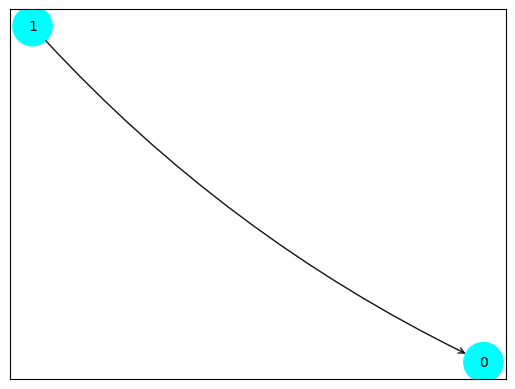

In [148]:
ax, G = Ex.visualize_subgraph(node_idx=None, edge_index=edge_index, edge_mask=edge_mask)
plt.show()